# Covid Data Analysis

This notebook uses John Hopkin's COVID-19 data for data exploration and analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import date as dt, timedelta
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from shared.environment import Paths, Secrets

## Load Data

In [3]:
fips_lookup_file = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
fips_lookup_df = pd.read_csv(fips_lookup_file)
column_map = {
    'Province/State': 'Province_State',
    'Country/Region': 'Country_Region',
    'Last Update': 'Last_Update',
    'Latitude': 'Lat',
    'Longitude': 'Long_'
}

In [4]:
data_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
start_date = dt(2020, 1, 21)
end_date = dt.today()

In [93]:
covid_df = pd.DataFrame()
for date in pd.date_range(start_date, end_date):
    file = os.path.join(data_path, f'{date:%m-%d-%Y}.csv')
    try:
        temp_df = pd.read_csv(file)
        temp_df.rename(columns=column_map, inplace=True)
        temp_df['date'] = date
        covid_df = pd.concat([covid_df, temp_df])
    except:
        print(f'{file} not found')
        pass

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-21-2020.csv not found
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv not found


### Compute Confirmed, Death, Recovery Rates

In [112]:
grouped_df = covid_df.groupby('Combined_Key')
covid_df['Confirmed_Rate'] = grouped_df['Confirmed'].pct_change()
covid_df['Death_Rate'] = grouped_df['Deaths'].pct_change()
covid_df['Recovery_Rate'] = grouped_df['Recovered'].pct_change()
covid_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [113]:
covid_us_df = covid_df[covid_df['Country_Region'] == 'US']

In [114]:
latest = covid_df['date'].max()
latest_covid_df = covid_df[covid_df['date'] == latest]
latest_covid_us_df = latest_covid_df[latest_covid_df['Country_Region'] == 'US']

In [115]:
output_cols = ['Combined_Key', 'Confirmed', 'Deaths', 'Recovered', 'Confirmed_Rate', 'Death_Rate', 'Recovery_Rate', 'Lat', 'Long_']
ts_cols = ['date'] + output_cols

## Top Hotspots in US

In [116]:
top_hotspots_df = latest_covid_us_df.sort_values('Confirmed', ascending=False)[:15]
top_hotspots_df[output_cols]

,Combined_Key,Confirmed,Deaths,Recovered,Confirmed_Rate,Death_Rate,Recovery_Rate,Lat,Long_
1747,"New York City, New York, US",103208.0,6898.0,0.0,0.049843,0.083399,NaN,40.767273,-73.971526
1729,"Nassau, New York, US",23553.0,846.0,0.0,0.042906,0.068182,NaN,40.740665,-73.589419
2305,"Suffolk, New York, US",20934.0,518.0,0.0,0.030166,0.131004,NaN,40.883201,-72.801217
2617,"Westchester, New York, US",19313.0,511.0,0.0,0.031182,0.108460,NaN,41.162784,-73.757417
541,"Cook, Illinois, US",14585.0,485.0,0.0,0.087054,0.065934,NaN,41.841448,-87.816588
2592,"Wayne, Michigan, US",11164.0,704.0,0.0,3.820380,14.304348,NaN,42.278056,-83.378611
162,"Bergen, New Jersey, US",9784.0,453.0,0.0,0.045076,0.041379,NaN,40.960109,-74.071643
1442,"Los Angeles, California, US",8894.0,269.0,0.0,0.052171,0.102459,NaN,34.308284,-118.228241
2085,"Rockland, New York, US",7721.0,200.0,0.0,0.032633,0.000000,NaN,41.150279,-74.025605
1101,"Hudson, New Jersey, US",7469.0,226.0,0.0,0.090206,0.234973,NaN,40.737662,-74.075157


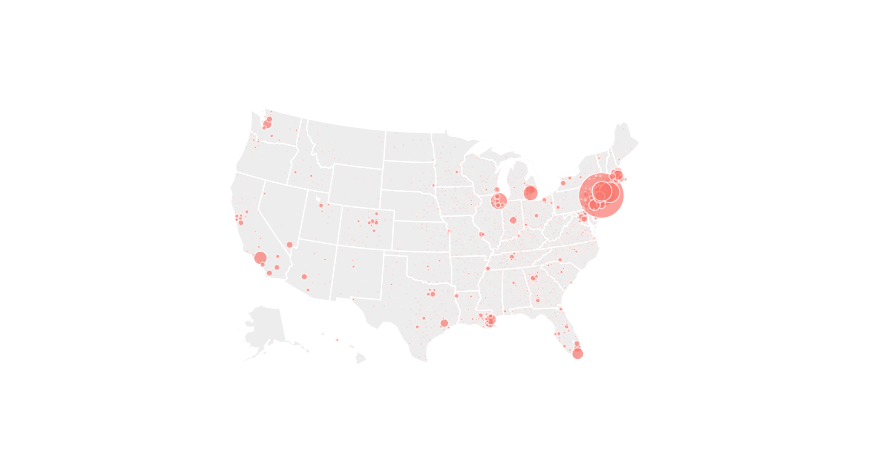

In [99]:
fig = go.Figure()

# for place in places:
fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lat = latest_covid_us_df['Lat'],
        lon = latest_covid_us_df['Long_'],
        text = latest_covid_us_df['Combined_Key'],
        marker = dict(
            size=latest_covid_us_df['Confirmed']/100,
            sizemode='area'
        ),
        name='Confirmed'))
fig.update_layout(
    geo = dict(
        scope = 'usa'
    ),
    template='ggplot2')
fig.show()

## Top Hotspots Global

In [117]:
latest_covid_df.sort_values('Confirmed', ascending=False)[:15][output_cols]

,Combined_Key,Confirmed,Deaths,Recovered,Confirmed_Rate,Death_Rate,Recovery_Rate,Lat,Long_
2960,Spain,166831.0,17209.0,62391.0,0.023334,0.036312,0.055525,40.463667,-3.749220
2888,Italy,156363.0,19899.0,34211.0,0.026873,0.022139,0.051546,41.871940,12.567380
2865,France,132591.0,14393.0,27186.0,0.173891,0.324225,0.279100,46.227600,2.213700
2869,Germany,127854.0,3022.0,60300.0,0.023585,0.104532,0.050523,51.165691,10.451526
1747,"New York City, New York, US",103208.0,6898.0,0.0,0.049843,0.083399,NaN,40.767273,-73.971526
2978,United Kingdom,84279.0,10612.0,344.0,0.066944,0.074633,0.000000,55.378100,-3.436000
2884,Iran,71686.0,4474.0,43894.0,0.023662,0.026853,0.046416,32.427908,53.688046
2754,"Hubei, China",67803.0,3219.0,64281.0,0.000000,0.000000,0.000265,30.975600,112.270700
2974,Turkey,56956.0,1198.0,3446.0,0.091801,0.088102,0.162226,38.963700,35.243300
2822,Belgium,29647.0,3600.0,6463.0,0.058141,0.075912,0.079686,50.833300,4.469936


## Top Hotspots New York

In [118]:
latest_covid_df[latest_covid_df['Province_State'] == 'New York'].sort_values('Confirmed', ascending=False)[:15][output_cols]

,Combined_Key,Confirmed,Deaths,Recovered,Confirmed_Rate,Death_Rate,Recovery_Rate,Lat,Long_
1747,"New York City, New York, US",103208.0,6898.0,0.0,0.049843,0.083399,NaN,40.767273,-73.971526
1729,"Nassau, New York, US",23553.0,846.0,0.0,0.042906,0.068182,NaN,40.740665,-73.589419
2305,"Suffolk, New York, US",20934.0,518.0,0.0,0.030166,0.131004,NaN,40.883201,-72.801217
2617,"Westchester, New York, US",19313.0,511.0,0.0,0.031182,0.108460,NaN,41.162784,-73.757417
2085,"Rockland, New York, US",7721.0,200.0,0.0,0.032633,0.000000,NaN,41.150279,-74.025605
1817,"Orange, New York, US",5027.0,145.0,0.0,0.037136,0.098485,NaN,41.403375,-74.302408
712,"Dutchess, New York, US",1838.0,12.0,0.0,0.053899,0.090909,NaN,41.764861,-73.743567
750,"Erie, New York, US",1571.0,57.0,0.0,0.043161,0.075472,NaN,42.762490,-78.730637
1663,"Monroe, New York, US",798.0,40.0,0.0,0.040417,0.000000,NaN,43.146389,-77.693229
2417,"Ulster, New York, US",655.0,11.0,0.0,0.112054,0.375000,NaN,41.890279,-74.262521


## Current Top Hotspots in US

In [119]:
latest_covid_us_df.sort_values('Confirmed_Rate', ascending=False)[:15][output_cols]

,Combined_Key,Confirmed,Deaths,Recovered,Confirmed_Rate,Death_Rate,Recovery_Rate,Lat,Long_
683,"Dona Ana, New Mexico, US",49.0,1.0,0.0,23.500000,NaN,NaN,32.352758,-106.832939
706,"Dukes and Nantucket, Massachusetts, US",21.0,1.0,0.0,20.000000,NaN,NaN,41.406747,-70.687635
676,"District of Columbia, District of Columbia, US",1875.0,50.0,0.0,17.382353,NaN,NaN,38.904178,-77.016560
1170,"Jasper, Missouri, US",18.0,0.0,0.0,8.000000,NaN,NaN,37.203519,-94.340505
1019,"Harris, Texas, US",3629.0,44.0,0.0,5.899240,13.666667,NaN,29.860000,-95.390000
216,"Bracken, Kentucky, US",6.0,0.0,0.0,5.000000,NaN,NaN,38.691590,-84.085324
276,"Butler, Kentucky, US",11.0,0.0,0.0,4.500000,NaN,NaN,37.209462,-86.687488
117,"Barren, Kentucky, US",5.0,0.0,0.0,4.000000,NaN,NaN,36.964698,-85.933389
2592,"Wayne, Michigan, US",11164.0,704.0,0.0,3.820380,14.304348,NaN,42.278056,-83.378611
2638,"Wilcox, Georgia, US",22.0,0.0,0.0,3.400000,NaN,NaN,31.974969,-83.434386


## Top Counties in each State

In [102]:
states = ['New York', 'Washington', 'Texas']
top_counties_df = (latest_covid_us_df
                       .assign(rank=latest_covid_us_df
                                        .sort_values(['Confirmed'], ascending=False)
                                        .groupby('Province_State')
                                        .cumcount() + 1)
                       .query('rank <= 5')
                       .sort_values(['Province_State', 'rank'])[['Province_State'] + output_cols]
)
top_counties_df[top_counties_df['Province_State'].isin(states)]

,Province_State,Combined_Key,Confirmed,Deaths,Recovered,Confirmed_Rate,Death_Rate,Recovery_Rate,Lat,Long_
1747,New York,"New York City, New York, US",103208.0,6898.0,0.0,0.049843,0.083399,NaN,40.767273,-73.971526
1729,New York,"Nassau, New York, US",23553.0,846.0,0.0,0.042906,0.068182,NaN,40.740665,-73.589419
2305,New York,"Suffolk, New York, US",20934.0,518.0,0.0,0.030166,0.131004,NaN,40.883201,-72.801217
2617,New York,"Westchester, New York, US",19313.0,511.0,0.0,0.031182,0.108460,NaN,41.162784,-73.757417
2085,New York,"Rockland, New York, US",7721.0,200.0,0.0,0.032633,0.000000,NaN,41.150279,-74.025605
1019,Texas,"Harris, Texas, US",3629.0,44.0,0.0,5.899240,13.666667,NaN,29.860000,-95.390000
616,Texas,"Dallas, Texas, US",1723.0,31.0,0.0,0.048054,0.148148,NaN,32.766706,-96.777960
2345,Texas,"Tarrant, Texas, US",787.0,25.0,0.0,0.116312,0.000000,NaN,32.771438,-97.291016
2393,Texas,"Travis, Texas, US",744.0,9.0,0.0,0.078261,0.000000,NaN,30.334320,-97.785356
172,Texas,"Bexar, Texas, US",723.0,27.0,0.0,0.087218,0.125000,NaN,29.449287,-98.520197


## Hotspot Analysis

In [103]:
top_hotspots =  top_hotspots_df['Combined_Key'].tolist()

### Growth Rate amongst hotspots

/Users/nbvasu/Code/git/notebooks/.venv/notebooks/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/nbvasu/Code/git/notebooks/.venv/notebooks/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



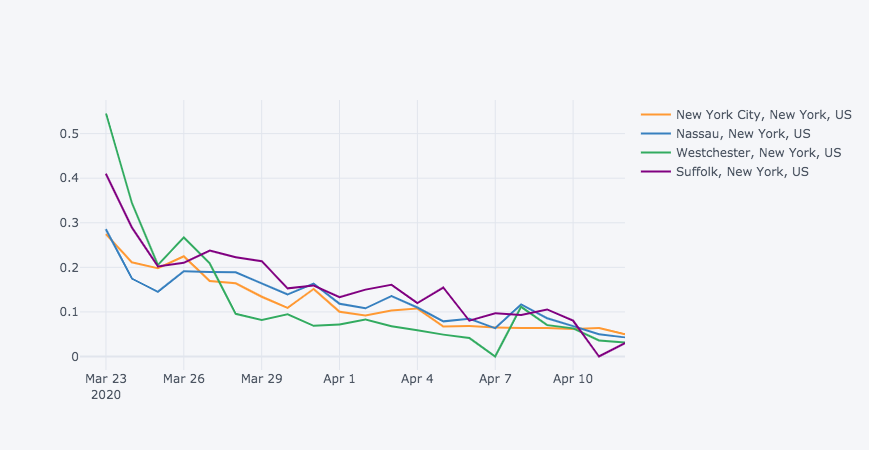

In [104]:
import cufflinks as cf

# cf.help('scatter')
(covid_us_df[covid_us_df['Combined_Key'].isin(top_hotspots[:4])] 
    .iplot(asFigure=True, x='date', y='Confirmed_Rate', 
           categories='Combined_Key', mode='lines'))


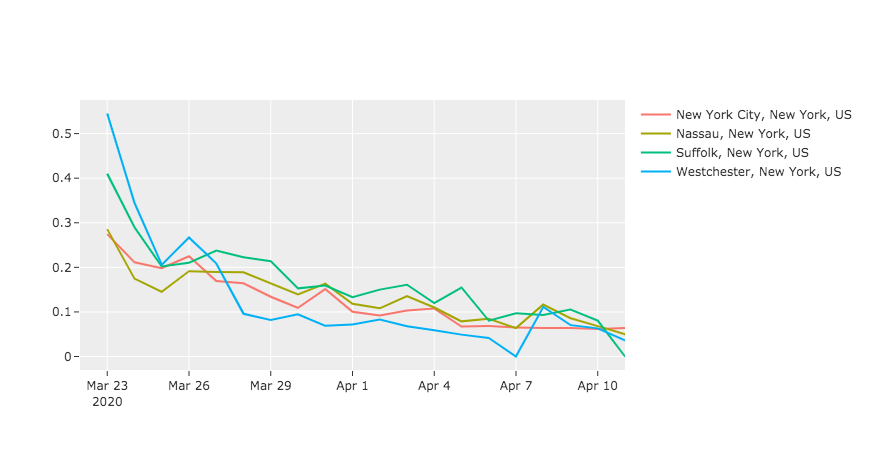

In [88]:
fig = go.Figure()
for place in top_hotspots[:4]:
    place_df = covid_us_df[covid_us_df['Combined_Key'] == place]
    fig.add_trace(go.Scatter(x=place_df['date'], y=place_df['Confirmed_Rate'], mode='lines', name=place))
    
fig.update_layout(
    autosize=False,
    template='ggplot2')
fig.show()

### Confirmed Cases amongst hotspots

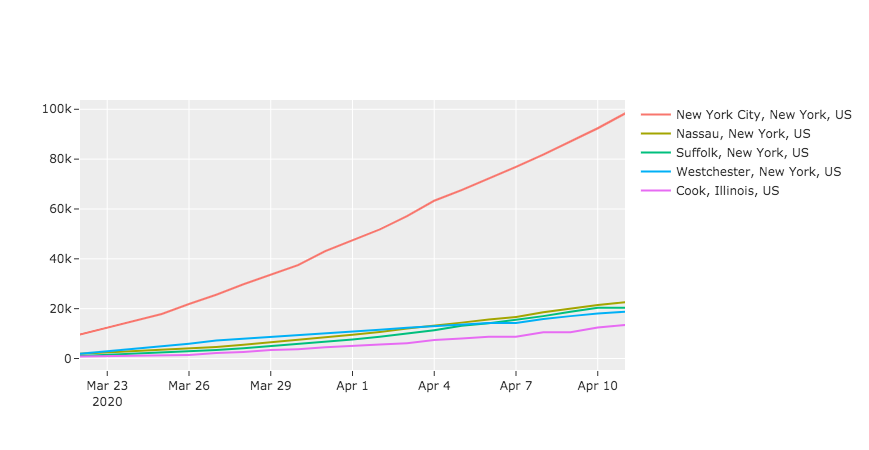

In [89]:
fig = go.Figure()
for place in top_hotspots[:5]:
    place_df = covid_us_df[covid_us_df['Combined_Key'] == place]
    fig.add_trace(go.Scatter(x=place_df['date'], y=place_df['Confirmed'], mode='lines', name=place))

    
fig.update_layout(
    autosize=False,
    template='ggplot2')
fig.show()